# ECBM 4040 - Assignment 1, Task 3: Dimensionality Reduction

Here is the third part and it is about dimentionality reduction. How to map high-dimentional data into low-dimensional space is an interesting topic in machine learning field. And also, it is related to another hot topic -- unsupervised learning. Now, in this section, you are going to learn two different methods for this question.

* Principal Component Analysis (PCA)
* t-Distributed Stochastic Neighbor Embedding (t-SNE) 

In [2]:
# Import modules
from __future__ import print_function
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt
from ecbm4040.cifar_utils import load_data

# Plot configurations
% matplotlib inline

# Notebook auto reloads code. (Ref: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
% load_ext autoreload
% autoreload 2

## Load Data

We will use the CIFAR-10 dataset.

In [3]:
# Load the raw CIFAR-10 data.
X_train, y_train, X_test, y_test = load_data()
X_train = X_train.reshape([50000,3,32,32]).transpose((0,2,3,1))
X_test = X_test.reshape([10000,3,32,32]).transpose((0,2,3,1))
# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

# Data organizations:
# Train data: 49000 samples from original train set: 1~49000
# Validation data: 1000 samples from original train set: 49000~50000
# Test data: 10000 samples from original test set: 1~10000
# Development data (for gradient check): 100 from the train set: 1~49000 #TODOTA is this 100 or 1000?
num_training = 49000
num_validation = 1000
num_dev = 100

X_val = X_train[-num_validation:]
y_val = y_train[-num_validation:]

mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

X_train = X_train[:num_training]
y_train = y_train[:num_training]

# Preprocessing: subtract the mean value across every dimension for training data
mean_image = np.mean(X_train, axis=0)

X_train = X_train.astype(np.float32) - mean_image.astype(np.float32)
X_val = X_val.astype(np.float32) - mean_image
X_test = X_test.astype(np.float32) - mean_image
X_dev = X_dev.astype(np.float32) - mean_image

print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('Development data shape:', X_dev.shape)
print('Development data shape', y_dev.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)
(49000, 32, 32, 3) (1000, 32, 32, 3) (10000, 32, 32, 3) (100, 32, 32, 3)
Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)
Development data shape: (100, 32, 32, 3)
Development data shape (100,)


## Part 1: Principal Component Analysis (PCA)

<span style="color:red"><strong>TODO</strong></span>: You have to complete the code in **./ecbm4040/features/pca.py**.

### Naive PCA

In [4]:
from ecbm4040.features.pca import pca_naive

X_patch = X_train[:,:,:,0]
X_patch = np.reshape(X_patch, (X_patch.shape[0], -1))

In [5]:
# Start PCA
K = 200
P, T = pca_naive(X_patch, K)

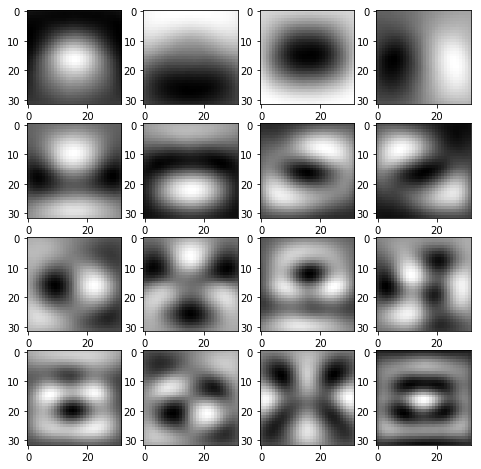

In [6]:
# TODO: Show principle components of P using a 4x4 subplot
# Visualize P
r = 4
f, axarr = plt.subplots(r, r, figsize=(8,8))
for i in range(r):
    for j in range(r):
        img = np.reshape(P[r*i+j], [32,32])
        axarr[i][j].imshow(img, cmap="gray")

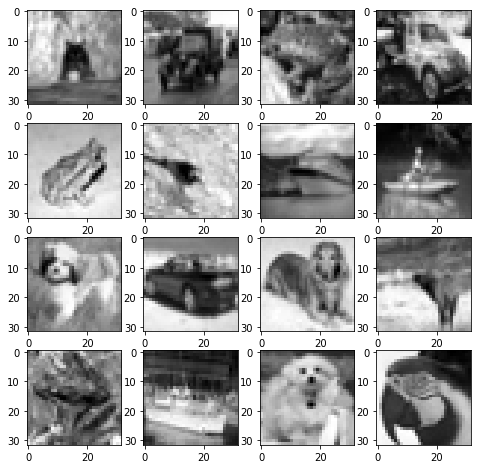

In [6]:
# Select a small set of images for test
num_training = 50000
num_pca = 16
mask = np.random.choice(num_training, num_pca, replace=False)
X_pca = X_train[mask,:,:,0]

# Visualize one channel of images 
r = 4
f, axarr = plt.subplots(r, r, figsize=(8,8))
for i in range(r):
    for j in range(r):
        img = X_pca[r*i+j]
        axarr[i][j].imshow(img, cmap="gray")

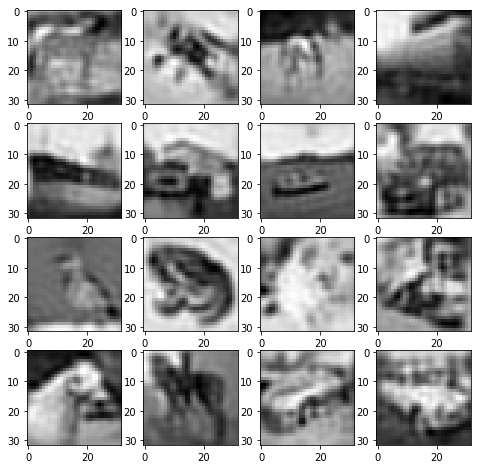

In [8]:
# TODO: Test your result
# Reduce dimension with P
X_features = []
for n in range(num_pca):
    img = X_pca[n]
    feature = np.dot(P, np.reshape(img, (-1,)))
    X_features.append(feature)

# Reconstruct image
X_recon = []
for n in range(num_pca):
    feature = X_features[n]
    img = np.reshape(np.dot(feature, P), (32,32))
    X_recon.append(img)

# Visualize results
r = 4
f, axarr = plt.subplots(r, r, figsize=(8,8))
for i in range(r):
    for j in range(r):
        img = X_recon[r*i+j]
        axarr[i][j].imshow(img, cmap="gray")

### PCA + Neural network

<span style="color:red"><strong>TODO</strong></span>: Use PCA to preprocess images before training a neural network: 

1. Do PCA preprocessing on each channel of the original image separately.
2. Stack PCA features from three channels into one vector, and use that vector as an input for MLP.
3. Train the MLP and show the results. 

In [9]:
print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('Development data shape:', X_dev.shape)
print('Development data shape', y_dev.shape)

(49000, 32, 32, 3) (1000, 32, 32, 3) (10000, 32, 32, 3) (100, 32, 32, 3)
Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)
Development data shape: (100, 32, 32, 3)
Development data shape (100,)


In [10]:
from ecbm4040.train_funcs import train, test
from ecbm4040.classifiers.mlp import MLP

# TODO: pca preprocessing -> mlp classification


In [11]:
X_train.shape

(49000, 32, 32, 3)

In [16]:
def extractFlattenReduceAppend(myMat, myList, channelIdx, dimRed = 200):
#     print(dimRed)
    myPatch = myMat[:,:,:,channelIdx]
    myPatch = np.reshape(myPatch, (myPatch.shape[0], -1))
    eigVecs, eigVals = pca_naive(myPatch, dimRed)
#     print(eigVecs.shape)
    XReduced = np.dot(myPatch, eigVecs.T)
    myList.append(XReduced)
dimRed = 200    
XFlattenedList_train = []
XFlattenedList_val = []
XFlattenedList_test = []
for channelIdx in range(X_train.shape[3]):
    extractFlattenReduceAppend(X_train, XFlattenedList_train, channelIdx, dimRed)
    extractFlattenReduceAppend(X_val, XFlattenedList_val, channelIdx, dimRed)
    extractFlattenReduceAppend(X_test, XFlattenedList_test, channelIdx, dimRed)
XFlattenedTrain = np.concatenate(XFlattenedList_train, axis = 1)
XFlattenedVal = np.concatenate(XFlattenedList_val, axis = 1)
XFlattenedTest = np.concatenate(XFlattenedList_test, axis = 1)
# I think we were supposed to perform PCA on each channel of each matrix first and then concat them together.    

In [17]:
print(XFlattenedTrain.shape, XFlattenedVal.shape, XFlattenedTest.shape, X_dev.shape)
print('Train data shape: ', XFlattenedTrain.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', XFlattenedVal.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', XFlattenedTest.shape)
print('Test labels shape: ', y_test.shape)
print('Development data shape:', X_dev.shape)
print('Development data shape', y_dev.shape)

(49000, 600) (1000, 600) (10000, 600) (100, 32, 32, 3)
Train data shape:  (49000, 600)
Train labels shape:  (49000,)
Validation data shape:  (1000, 600)
Validation labels shape:  (1000,)
Test data shape:  (10000, 600)
Test labels shape:  (10000,)
Development data shape: (100, 32, 32, 3)
Development data shape (100,)


In [18]:
from ecbm4040.classifiers.mlp import MLP
from ecbm4040.train_funcs import train, test

# TODO: Use a sequence of layers to create a multiple layer neural network
# input->(affine->activation)-> ... ->(affine->activation)->(affine->softmax)->output
model = MLP(input_dim = XFlattenedTrain.shape[1], 
            hidden_dims=[100], num_classes=10, reg=0.1, weight_scale=1e-3)

num_epoch = 10
batch_size = 512
lr = 1e-3
verbose = True
train_acc_hist, val_acc_hist = train(model, XFlattenedTrain, y_train, XFlattenedVal, y_val, 
                  num_epoch=num_epoch, batch_size=batch_size, learning_rate=lr, verbose=verbose)
test(model, XFlattenedTest, y_test)

number of batches for training: 95
5120/49000 loss: 2.2931885755801313
10240/49000 loss: 2.235172441045855
15360/49000 loss: 2.1480664909725204
20480/49000 loss: 2.105758892904318
25600/49000 loss: 2.0446863722434903
30720/49000 loss: 1.9830004817316251
35840/49000 loss: 1.9606787625221531
40960/49000 loss: 1.9554453227574717
46080/49000 loss: 1.86636068867372
epoch 1: valid acc = 0.046, new learning rate = 0.00095
5120/49000 loss: 1.8989389610925627
10240/49000 loss: 1.8885711556965312
15360/49000 loss: 1.8222169638082895
20480/49000 loss: 1.8679761911643822
25600/49000 loss: 1.7501673175110424
30720/49000 loss: 1.8007549868825172
35840/49000 loss: 1.775031675793638
40960/49000 loss: 1.752508729865842
46080/49000 loss: 1.7668407607484868
epoch 2: valid acc = 0.054, new learning rate = 0.0009025
5120/49000 loss: 1.7367671212756035
10240/49000 loss: 1.7063008853883013
15360/49000 loss: 1.6877118571801932
20480/49000 loss: 1.702573028792694
25600/49000 loss: 1.6670824393164756
30720/4900

0.23710000000000001

<span style="color:red"><strong>TODO</strong></span>: Plot training, validation and test set accuracy.

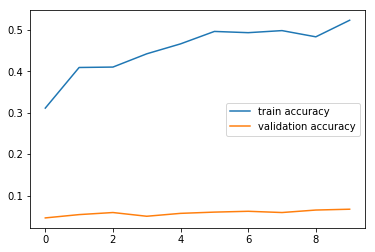

In [19]:
# TODO:
plt.plot(train_acc_hist, label="train accuracy")
plt.plot(val_acc_hist, label="validation accuracy")
plt.legend()
plt.show()

## Part 2: t-SNE (not graded)

t-SNE is is a machine learning algorithm for nonlinear dimensionality reduction developed by Geoffrey Hinton and Laurens van der Maaten. It is also a good way of visualizing high-dimensional data in 2D. We show its application for CIFAR10. Later it will be re-used in a CNN network. Experimenting with t-SNE can be fun. One thing to try is to visualize the output of each layer of MLP to observe the differences.

<p style="line-height: 1.2;">[1] Maaten, Laurens van der, and Geoffrey Hinton. "Visualizing data using t-SNE." Journal of Machine Learning Research 9.Nov (2008): 2579-2605.</p>
<p style="line-height: 1.2;">[2] Adaptive learning rate scheme by Jacobs https://www.willamette.edu/~gorr/classes/cs449/Momentum/deltabardelta.html</p>
<p style="line-height: 1.2;">[3] http://cs.stanford.edu/people/karpathy/cnnembed/</p>
<p style="line-height: 1.2;">[4] How to Use t-SNE Effectively, with examples.
 https://distill.pub/2016/misread-tsne</p>

In [20]:
from ecbm4040.features.tsne import tsne

#### tSNE of original data

In [21]:
random_select = np.random.choice(10000, 500, replace=False)
X = X_test[random_select,:,:,0].reshape(500,1024).astype('float')/255.0
tic = time.time()
Y = tsne(X, low_dim=2, perplexity=30.0)
print("it takes {} seconds".format(time.time()-tic))

2.46877793639
The 100 th loop cost: 14.982693854151051, computation time: 0.8480358123779297
The 200 th loop cost: 1.1519096557161386, computation time: 1.7467575073242188
The 300 th loop cost: 1.14841863384419, computation time: 2.5877556800842285
The 400 th loop cost: 1.1483916776051837, computation time: 3.4930155277252197
The 500 th loop cost: 1.1483916496632822, computation time: 4.372509956359863
The 600 th loop cost: 1.148391649634428, computation time: 5.487975835800171
The 700 th loop cost: 1.148391649634383, computation time: 6.592734098434448
The 800 th loop cost: 1.148391649634382, computation time: 7.49008584022522
The 900 th loop cost: 1.1483916496343816, computation time: 8.479710817337036
The 1000 th loop cost: 1.1483916496343818, computation time: 9.361876010894775
it takes 9.929040670394897 seconds


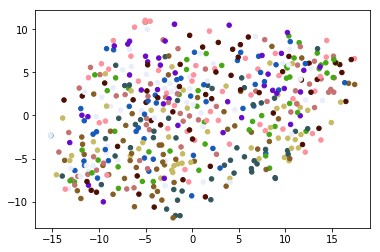

In [22]:
## visualize tSNE of original data
labels = y_test[random_select]
colors = np.random.rand(10,3)
color_labels = [colors[int(i)] for i in labels.tolist()]
plt.scatter(Y[:,0], Y[:,1], 20, color_labels)
plt.show()

#### tSNE of data after two hidden layers

In the visualization result, you should find that in comparison with the tSNE of original data where all data points mess up with each other, the tSNE of data after two-layer networks is shown as multiple clusters in a 2D panel.

In [23]:
# Define MLP model
model = MLP(input_dim=3072, hidden_dims=[100], num_classes=10, reg=0.1, weight_scale=1e-2)

num_epoch = 10
batch_size = 200
lr = 1e-3
verbose = False
train_acc_hist, val_acc_hist = train(model, X_train, y_train, X_val, y_val, 
                  num_epoch=num_epoch, batch_size=batch_size, learning_rate=lr, verbose=verbose)
test(model, X_test, y_test)

number of batches for training: 245
epoch 1: valid acc = 0.333, new learning rate = 0.00095
epoch 2: valid acc = 0.412, new learning rate = 0.0009025
epoch 3: valid acc = 0.423, new learning rate = 0.000857375
epoch 4: valid acc = 0.451, new learning rate = 0.0008145062499999999
epoch 5: valid acc = 0.485, new learning rate = 0.0007737809374999998
epoch 6: valid acc = 0.484, new learning rate = 0.0007350918906249997
epoch 7: valid acc = 0.501, new learning rate = 0.0006983372960937497
epoch 8: valid acc = 0.518, new learning rate = 0.0006634204312890621
epoch 9: valid acc = 0.511, new learning rate = 0.000630249409724609
epoch 10: valid acc = 0.516, new learning rate = 0.0005987369392383785
test acc: 0.5021


0.50209999999999999

In [24]:
# run tSNE
X = X_test[random_select]
X = model.layers[0].feedforward(X)
X = model.layers[1].feedforward(X)
X_exp = np.exp(X)
X = X_exp / np.tile(np.sum(X_exp, axis=1, keepdims=True), 10)

tic = time.time()
Y = tsne(X, low_dim=2, perplexity=30.0)
print("it takes {} seconds".format(time.time()-tic))

0.190181029856
The 100 th loop cost: 11.248333148756638, computation time: 0.9497675895690918
The 200 th loop cost: 0.5133177485300536, computation time: 1.788210153579712
The 300 th loop cost: 0.49683584742492576, computation time: 2.6259148120880127
The 400 th loop cost: 0.495228231016006, computation time: 3.467878818511963
The 500 th loop cost: 0.4950547913999659, computation time: 4.302442312240601
The 600 th loop cost: 0.49502101203797566, computation time: 5.138434410095215
The 700 th loop cost: 0.4950116196935999, computation time: 5.970518350601196
The 800 th loop cost: 0.4950082622520308, computation time: 6.816809415817261
The 900 th loop cost: 0.4950068779734638, computation time: 7.656616926193237
The 1000 th loop cost: 0.49500629204264435, computation time: 8.493455648422241
it takes 9.102674961090088 seconds


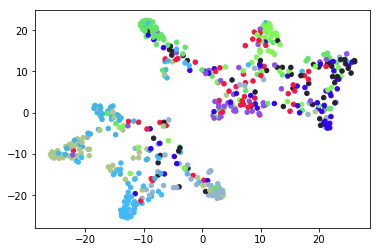

In [25]:
# visualize tSNE 2D representation of data after two hidden layers
labels = y_test[random_select]
colors = np.random.rand(10,3)
color_labels = [colors[int(i)] for i in labels.tolist()]
plt.scatter(Y[:,0], Y[:,1], 20, color_labels)
plt.show()